In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
import numpy
K.set_image_dim_ordering('th')

seed = 88
numpy.random.seed(seed)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


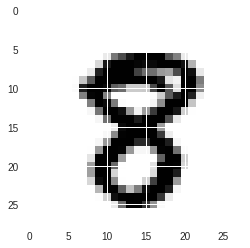

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

#selecting a random image from the dataset
image_index = 23456

# print the label
print(y_train[image_index])

#show the image
plt.imshow(x_train[image_index], cmap='Greys') 

In [81]:
#show the shape of the data set
x_train.shape

(60000, 28, 28)

In [82]:
from keras.utils import np_utils


# flatten 28*28 images to a 784 vector for each image
# reshaping the data so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 1, 28, 28)
Number of images in x_train 60000
Number of images in x_test 10000


In [83]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.layers.normalization import BatchNormalization

# Creating a Sequential Model and adding the layers
model = Sequential()

# 2D convolution layer with 28 nodes at the 1st layer, kernel size of 5,5 = 5x5 filter matrix
model.add(Conv2D(56, (5, 5), input_shape=(1, 28, 28), activation='relu'))

# pooling layer to reduce the spatial size of the representation to reduce the parameter counts which 
# reduces the computational complexity
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

#Dropout layers fight with the overfitting by disregarding some of the neurons
model.add(Dropout(0.2))
#Flatten layers flatten 2D arrays to 1D array for fully connected layers
model.add(Flatten()) 
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(192, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(BatchNormalization())

#final Dense layer must have 10 neurons
model.add(Dense(num_classes,activation=tf.nn.softmax))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 56, 24, 24)        1456      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 56, 12, 12)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 15, 10, 10)        7575      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 15, 5, 5)          0         
_________________________________________________________________
batch_normalization_44 (Batc (None, 15, 5, 5)          20        
_________________________________________________________________
dropout_41 (Dropout)         (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 375)               0         
__________

In [92]:
model.compile(Adam(lr=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
hist = model.fit(x_train, y_train, batch_size=100, epochs=9,validation_data=(x_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/9
60000/60000 [==============================] - 22s 374us/step - loss: 0.0349 - acc: 0.9898 - val_loss: 0.0289 - val_acc: 0.9916
Epoch 2/9
60000/60000 [==============================] - 16s 274us/step - loss: 0.0314 - acc: 0.9912 - val_loss: 0.0189 - val_acc: 0.9937
Epoch 3/9
60000/60000 [==============================] - 16s 273us/step - loss: 0.0299 - acc: 0.9913 - val_loss: 0.0216 - val_acc: 0.9935
Epoch 4/9
60000/60000 [==============================] - 16s 267us/step - loss: 0.0292 - acc: 0.9917 - val_loss: 0.0247 - val_acc: 0.9930
Epoch 5/9
60000/60000 [==============================] - 16s 268us/step - loss: 0.0287 - acc: 0.9916 - val_loss: 0.0248 - val_acc: 0.9921
Epoch 6/9
60000/60000 [==============================] - 16s 266us/step - loss: 0.0251 - acc: 0.9927 - val_loss: 0.0234 - val_acc: 0.9936
Epoch 7/9
60000/60000 [==============================] - 16s 268us/step - loss: 0.0226 - acc: 0.9936 - val_loss: 0.0226 - 

In [93]:
scores = model.evaluate(x_test, y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

10000/10000 [==============================] - 2s 184us/step
CNN Error: 0.67%


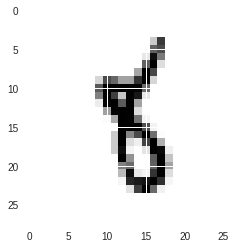

In [94]:
image_index = 5678
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')


In [95]:
pred = model.predict(x_test[5678].reshape(1, 1, 28, 28))
print(pred.argmax())

8


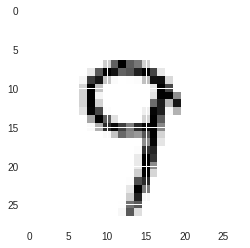

In [96]:
image_index = 2345
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')

In [97]:
pred = model.predict(x_test[image_index].reshape(1, 1, 28, 28))
print(pred.argmax())
print(image_index)

9
2345


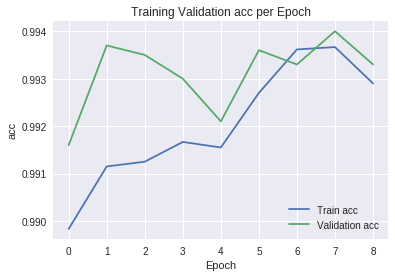

In [98]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

# Plot legend and use the best location automatically: loc = 0
plt.legend(["Train acc", "Validation acc"], loc = 'lower right')
plt.title("Training Validation acc per Epoch")
plt.xlabel("Epoch")
plt.ylabel("acc")
plt.show()

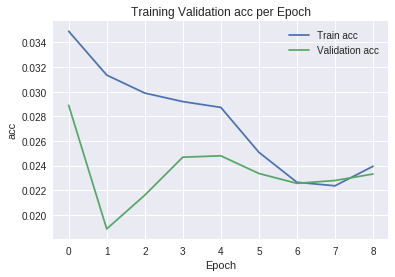

In [99]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

# Plot legend and use the best location automatically: loc = 0
plt.legend(["Train acc", "Validation acc"], loc = 'upper right')
plt.title("Training Validation acc per Epoch")
plt.xlabel("Epoch")
plt.ylabel("acc")
plt.show()